# GMM

In [38]:
%matplotlib inline

In [39]:
train_size=10000
dimension=2
test_size=10000
X_train = np.load("../data/gmm/data_ten_dimensions.npy")[:train_size, :dimension]
X_test = np.load("../data/gmm/data_test_ten_dimensions.npy")[:test_size, :dimension]
X_test_densities = np.load("../data/gmm/probability_test_ten_dimensions_" + str(dimension) + ".npy")[:test_size]
    

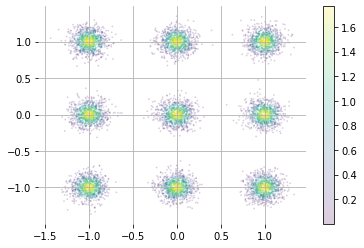

<Figure size 432x288 with 0 Axes>

In [42]:
plt.axes(frameon = 0)
plt.grid()
plt.scatter(X_test[:,0], X_test[:,1], c = X_test_densities, alpha=.2,s = 3, linewidths= 0.01)
plt.colorbar()
plt.show()
plt.savefig('../reports/gmm_dataset.eps')

In [43]:
def plotMeshGridWithRealEstimation(model, path_name):
    x, y = np.mgrid[-2:2:.1, -2:2:.1]
    pos = np.dstack((x, y))
    X_plot = pos.reshape([1600,2])

    probs_dmkde =  model.get_all_density(X_plot)
    plotMesh(x, y, probs_dmkde, path_name)

In [44]:
from matplotlib import ticker, cm
def plotMesh(x, y, probability_array, path_name):
    plt.axes(frameon = 0)
    params = {
    'axes.labelsize': 40,
    'legend.fontsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'text.usetex': False,
    'figure.figsize': [7.0, 6.0]
    }
    plt.rcParams.update(params)

    print("max probability:", probability_array.max())
    print("min probability:", probability_array.min())

    print("log max probability:", np.log(probability_array.max()))
    print("log min probability:", np.log(probability_array.min()))

    #fig2 = plt.figure()
    #ax2 = fig2.add_subplot(111)
    plt.contourf(x, y, probability_array.reshape([40,40]), cmap=cm.PuBu_r)
    plt.colorbar()
    plt.savefig(path_name)
    plt.show()
    plt.savefig('../reports/gmm_true_density.eps')

In [45]:
import numpy as np
import itertools
from scipy.stats import multivariate_normal

class GMM_indep_sampler(object):
    def __init__(self, N, sd, dim, n_components, weights=None, bound=1):
        np.random.seed(1024)
        self.total_size = N
        self.dim = dim
        self.sd = sd
        self.n_components = n_components
        self.centers = np.linspace(-bound, bound, n_components)
        self.X = np.vstack([self.generate_gmm() for _ in range(dim)]).T
        self.X_train, self.X_val, self.X_test = self.split(self.X)
        self.nb_train = self.X_train.shape[0]
        self.Y=None
    def generate_gmm(self,weights = None):
        if weights is None:
            weights = np.ones(self.n_components, dtype=np.float64) / float(self.n_components)
        Y = np.random.choice(self.n_components, size=self.total_size, replace=True, p=weights)
        return np.array([np.random.normal(self.centers[i],self.sd) for i in Y],dtype='float64')
    def split(self,data):
        N_test = int(0.1*data.shape[1])
        data_test = data[-N_test:]
        data = data[0:-N_test]
        N_validate = int(0.1*data.shape[0])
        data_validate = data[-N_validate:]
        data_train = data[0:-N_validate]
        data = np.vstack((data_train, data_validate))
        return data_train, data_validate, data_test

    def train(self, batch_size):
        indx = np.random.randint(low = 0, high = self.nb_train, size = batch_size)
        return self.X_train[indx, :]

    def get_partitions(self):
        data = np.vstack((self.X_train, self.X_val))
        return self.X_train, self.X_val, self.X_test, data

    def load_all(self):
        return self.X, self.Y

    def get_single_density(self,data):
        possible_centers = list(itertools.product(*[self.centers for x in range(self.dim)]))
        #print(possible_centers)
        gmm_probability = []
        for center in possible_centers:
           array = []
           for axis, axis_center in zip(data,center):
              #print(data, axis, axis_center, self.sd)
              #print(scipy.stats.norm.pdf(axis, loc=axis_center, scale=self.sd))
              array.append(scipy.stats.norm.pdf(axis, loc=axis_center, scale=self.sd))
           product = np.product(np.array(array))
           #print(product)
           gmm_probability.append(product)
        gmm_probability = np.array(gmm_probability)
        #print(gmm_probability)
        return gmm_probability.sum() / len(gmm_probability)

    def get_all_density(self,batch_data):
        assert batch_data.shape[1]==self.dim
        p_all = [*map(self.get_single_density,batch_data)]
        return np.array(p_all)    

best_sd, best_scale = 0.05, 0.5
ys = GMM_indep_sampler(N=100, sd=0.1, dim=2, n_components=3, bound=1)
X, Y = ys.load_all()
data = X
ys.get_single_density(X[3,:])

0.12264489513355747

max probability: 1.768388256576615
min probability: 6.578538669568035e-44
log max probability: 0.5700685422425266
log min probability: -99.42993145775748


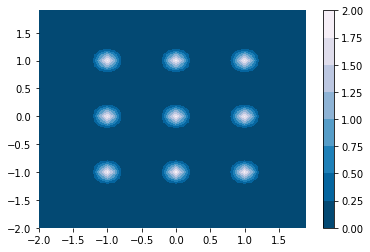

<Figure size 504x432 with 0 Axes>

In [46]:
plotMeshGridWithRealEstimation(ys, "raw_kde.png")

# Several figures

In [55]:
import sys
parent_path = "/Doctorado/2021-2-anomaly-detection/"
os.chdir(parent_path)
sys.path.insert(0, parent_path)
sys.path.append('submodules/qmc/')
sys.path.append('data/')
#sys.path.append('../../../../submodules/qmc/')
print(sys.path)
# %cd ../../
import os
print(os.getcwd())

sys.path.append('submodules/qmc/')
sys.path.append('scripts/')

  

['/Doctorado/2021-2-anomaly-detection/', '/media/Proyectos/Doctorado/2021-2-conditional-density-estimation/notebooks', '/home/joag/.pyenv/versions/3.9.9/lib/python39.zip', '/home/joag/.pyenv/versions/3.9.9/lib/python3.9', '/home/joag/.pyenv/versions/3.9.9/lib/python3.9/lib-dynload', '', '/home/joag/.cache/pypoetry/virtualenvs/2021-02-conditional-density-estimation-81fTIEwr-py3.9/lib/python3.9/site-packages', '/home/joag/.cache/pypoetry/virtualenvs/2021-02-conditional-density-estimation-81fTIEwr-py3.9/lib/python3.9/site-packages/IPython/extensions', '/home/joag/.ipython', 'submodules/qmc/', 'data/', 'submodules/qmc/', 'scripts/', 'submodules/qmc/', 'data/', 'submodules/qmc/', 'scripts/', 'submodules/qmc/', 'data/', 'submodules/qmc/', 'scripts/', 'submodules/qmc/', 'data/', 'submodules/qmc/', 'scripts/', 'submodules/qmc/', 'data/', 'submodules/qmc/', 'scripts/', 'submodules/qmc/', 'data/']
/media/Proyectos/Doctorado/2021-2-anomaly-detection


In [59]:

import mlflow

mlflow.set_tracking_uri("sqlite:///../mlflow/tracking.db")
mlflow.set_registry_uri("sqlite:///../mlflow/registry.db")

from mlflow.tracking.client import MlflowClient
from mlflow.entities import ViewType
import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.use('TkAgg')
import os

client = MlflowClient()
experiments_list = client.list_experiments()
print(experiments_list)


algorithms = ["dmkde", "dmkde_sgd", "made", "inverse_maf", "planar_flow", "neural_splines"]
datasets = ["arc", "bimodal_l", "binomial", "potential_1", "potential_2", "potential_3",
                "potential_4", "star_eight", "swiss_roll"]

fig, axs = plt.subplots(9, 6, figsize=(80,80))

for j, dataset in enumerate(datasets):
    for i, algorithm in enumerate(algorithms):
        query = f"params.z_run_name = '{dataset}_{algorithm}'"



        runs = mlflow.search_runs(experiment_ids="1", filter_string=query, 
            run_view_type=ViewType.ACTIVE_ONLY, output_format="pandas")

        try:
            runs = runs.sort_values("metrics.pearson_value", ascending=False)

            best_run = runs.iloc[0]


            client.list_artifacts(best_run.run_id)

            local_dir = "/tmp/artifact_downloads"
            if not os.path.exists(local_dir):
                os.mkdir(local_dir)
            local_path = client.download_artifacts(best_run.run_id, "", local_dir)
            print("Artifacts downloaded in: {}".format(local_path))
            print("Artifacts: {}".format(os.listdir(local_path)))


            img = plt.imread(f"{local_dir}/test_density.png")

            axs[j,i].imshow(img)
            axs[j,i].set_title(algorithm)
        except:
            pass
plt.savefig("/tmp/imagen_2.pdf")
plt.show()

2022/02/08 15:38:51 WARNING mlflow.store.db.utils: SQLAlchemy engine could not be created. The following exception is caught.
(sqlite3.OperationalError) unable to open database file
(Background on this error at: https://sqlalche.me/e/14/e3q8)
Operation will be retried in 0.1 seconds
2022/02/08 15:38:51 WARNING mlflow.store.db.utils: SQLAlchemy engine could not be created. The following exception is caught.
(sqlite3.OperationalError) unable to open database file
(Background on this error at: https://sqlalche.me/e/14/e3q8)
Operation will be retried in 0.3 seconds
2022/02/08 15:38:51 WARNING mlflow.store.db.utils: SQLAlchemy engine could not be created. The following exception is caught.
(sqlite3.OperationalError) unable to open database file
(Background on this error at: https://sqlalche.me/e/14/e3q8)
Operation will be retried in 0.7 seconds
2022/02/08 15:38:52 WARNING mlflow.store.db.utils: SQLAlchemy engine could not be created. The following exception is caught.
(sqlite3.OperationalEr

KeyboardInterrupt: 